## This file shows the whole analysis for the Apple Stock for 2-3 days with high-frequency trading from 9:30 am to 4 pm

#### The code reads a CSV file, renames its columns, and splits the "Date and Time" column into separate "Date" and "Time" columns in a Pandas DataFrame for the stock data of ticker Apple on October 18, 2016, with minute-level OHLCV information.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'sp500_tickers_A-D_1min_1pppix/AA_1min.csv')
# This line renames the columns by the type of thing they represent
df.rename(columns={'2016-10-18 04:04:00': 'Date and Time', '26.5376': 'Open', '26.5376.1': 'High', '26.5376.2': 'Low', '26.5376.3': 'Close', '100': 'Volume'}, inplace=True)
df[['Date', 'Time']] = df['Date and Time'].str.split(' ', expand=True)
print(df.head())

         Date and Time     Open     High      Low    Close  Volume  \
0  2016-10-18 04:10:00  26.5873  26.5972  26.5873  26.5972     400   
1  2016-10-18 04:11:00  26.5972  26.5972  26.5873  26.5873     700   
2  2016-10-18 04:14:00  26.5773  26.5773  26.5376  26.5376     700   
3  2016-10-18 06:30:00  26.5376  26.5376  26.5376  26.5376     500   
4  2016-10-18 06:43:00  26.5574  26.5574  26.5475  26.5475    1000   

         Date      Time  
0  2016-10-18  04:10:00  
1  2016-10-18  04:11:00  
2  2016-10-18  04:14:00  
3  2016-10-18  06:30:00  
4  2016-10-18  06:43:00  


In [103]:
df.drop(['Date and Time'], axis =1) # Drop the existing data and time column as separated column is available
df = df[['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']] # Rearranging the columns in a particular order
print(df.head())

         Date      Time     Open     High      Low    Close  Volume
0  2016-10-18  04:10:00  26.5873  26.5972  26.5873  26.5972     400
1  2016-10-18  04:11:00  26.5972  26.5972  26.5873  26.5873     700
2  2016-10-18  04:14:00  26.5773  26.5773  26.5376  26.5376     700
3  2016-10-18  06:30:00  26.5376  26.5376  26.5376  26.5376     500
4  2016-10-18  06:43:00  26.5574  26.5574  26.5475  26.5475    1000


In [104]:
df2 = df.loc[(df['Time'] >= '09:30:00') & (df['Time'] <= '16:00:00') & (df['Date'] == '2016-10-18')] # Filtering values from 9:30 am to 4 pm on a particular date
print(df2)
df4 = df2.loc[(df['Time'] >= '09:30:00') & (df['Time'] <= '10:00:00')]

           Date      Time     Open     High      Low    Close  Volume
45   2016-10-18  09:30:00  26.4084  26.5077  26.4084  26.4481  167664
46   2016-10-18  09:31:00  26.4779  26.4978  26.3587  26.3686   74660
47   2016-10-18  09:32:00  26.3587  26.3587  26.0903  26.0903   81956
48   2016-10-18  09:33:00  26.1002  26.1201  26.0108  26.0694   61398
49   2016-10-18  09:34:00  26.0804  26.1301  26.0605  26.1201   92378
..          ...       ...      ...      ...      ...      ...     ...
431  2016-10-18  15:56:00  26.3686  26.3686  26.3537  26.3537   82206
432  2016-10-18  15:57:00  26.3537  26.3636  26.3189  26.3288   92396
433  2016-10-18  15:58:00  26.3239  26.3487  26.3189  26.3487   62267
434  2016-10-18  15:59:00  26.3438  26.3487  26.3388  26.3388  100134
435  2016-10-18  16:00:00  26.3487  26.3487  26.3487  26.3487  609222

[391 rows x 7 columns]


## Q1

#### Plotting the Closing Price against the time for a particular date i.e. 2016-10-18 using Matplotlib

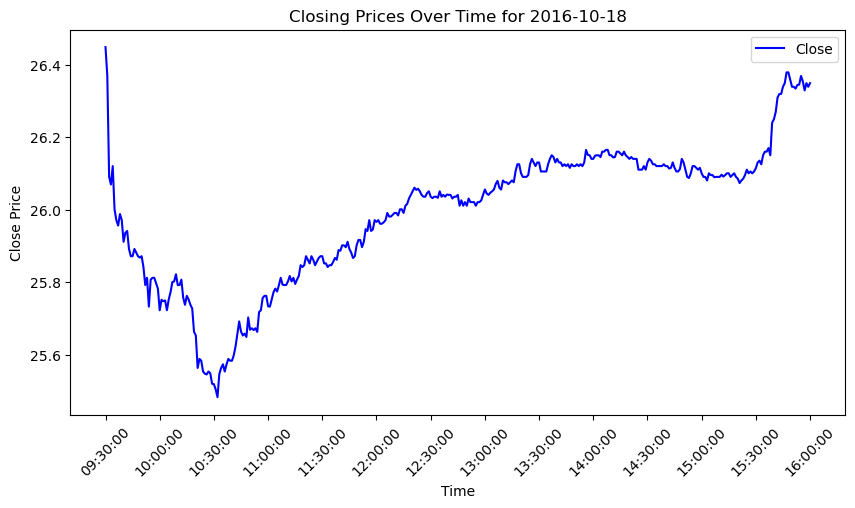

In [105]:

import plotly.graph_objects as go
from datetime import datetime

df2.plot(x = 'Time', y= 'Close', kind = 'line', figsize=(10, 5), color = 'Blue')

# Add chart title
plt.title('Closing Prices Over Time for 2016-10-18')

# Add axis titles
plt.xlabel('Time')
plt.ylabel('Close Price')

# Customize x-axis tick positions and labels (30-minute intervals)
xtick_positions = range(0, len(df2), 30)  # Tick positions at 30-minute intervals
xtick_labels = df2['Time'].iloc[xtick_positions]  # Corresponding time labels

# Set the x-axis ticks
plt.xticks(xtick_positions, xtick_labels, rotation=45)  # Adjusted rotation 
plt.show()


### Plotting day-wise closing prices i.e. the closing price for at 4 pm for every day in the dataset 

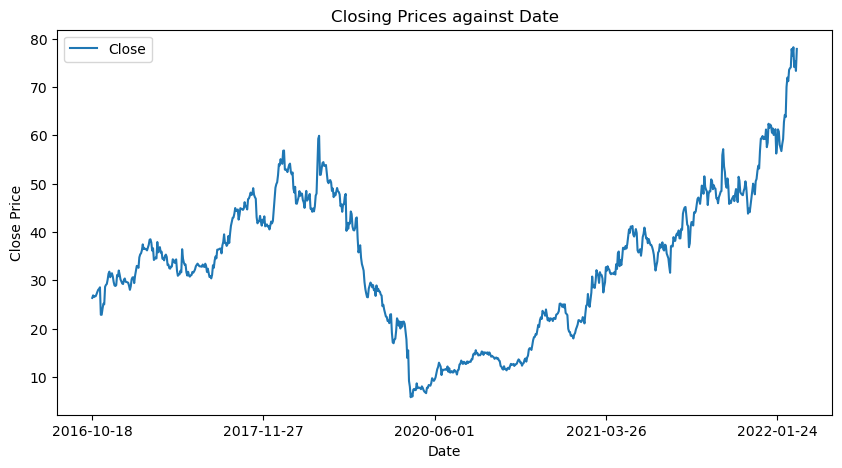

In [106]:
df3 = df.loc[(df['Time'] == '16:00:00')] # Filtering values of day by day closing price
df3.plot(x = 'Date', y= 'Close', kind = 'line', figsize=(10, 5))

# Add chart title
plt.title('Closing Prices against Date')

# Add axis titles
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

### Plotting values from 9:30 am to 10 am on candlestick chart with Volume on secondary Y-axis denoted by light blue scattered dots

          Date      Time     Open     High      Low    Close  Volume
45  2016-10-18  09:30:00  26.4084  26.5077  26.4084  26.4481  167664
49  2016-10-18  09:34:00  26.0804  26.1301  26.0605  26.1201   92378
53  2016-10-18  09:38:00  25.9611  25.9879  25.9114  25.9879   70513
56  2016-10-18  09:41:00  25.9064  25.9412  25.9064  25.9362   47449
57  2016-10-18  09:42:00  25.9362  25.9412  25.9015  25.9412  112806
60  2016-10-18  09:45:00  25.8716  25.9213  25.8716  25.8716   44224
61  2016-10-18  09:46:00  25.8716  25.8915  25.8677  25.8915   27704
65  2016-10-18  09:50:00  25.8716  25.8965  25.8617  25.8716   68581
68  2016-10-18  09:53:00  25.7822  25.8219  25.7822  25.8120   48031
70  2016-10-18  09:55:00  25.7375  25.8070  25.7226  25.8070   63598
71  2016-10-18  09:56:00  25.8120  25.8309  25.8120  25.8120   25783
72  2016-10-18  09:57:00  25.8120  25.8219  25.8021  25.8120   14445


Text(0, 0.5, 'Volume in Thousands')

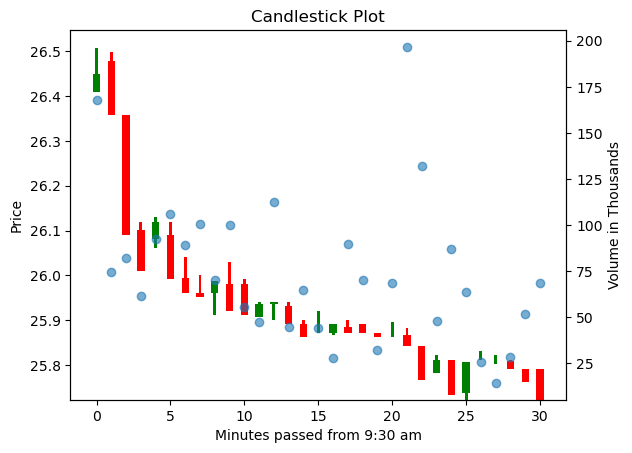

In [107]:
# Filtering the stocks to assist in plotting of bar graph
up = df4[df4['Close'] >= df4['Open']]
down = df4[df4['Close'] < df4['Open']]
print(up)

# Choosing green for stocks where close >= open and red when open > close
col1 = 'green'
col2 = 'red'

width = .5
width2 = .2
# Making 3 bars at the same place of different widths whose lengths are equal to the differences in the prices of these quantities
plt.bar(up.index -45, up['Close']-up['Open'], width, bottom = up['Open'], color = col1)
plt.bar(up.index -45, up['High']-up['Close'], width2, bottom = up['Close'], color = col1)
plt.bar(up.index -45, up['Low']-up['Open'], width2, bottom = up['Open'], color = col1)

## Making 3 bars at the same place of different widths whose lengths are equal to the differences in the prices of these quantities
plt.bar(down.index-45, down['Close']-down['Open'], width, bottom = down['Open'], color = col2)
plt.bar(down.index-45, down['High']-down['Open'], width2, bottom = down['Open'], color = col2)
plt.bar(down.index-45, down['Low']-down['Close'], width, bottom = down['Close'], color = col2)
plt.title('Candlestick Plot')

# Add axis titles
plt.xlabel('Minutes passed from 9:30 am')
plt.ylabel('Price')

# Making a twin of X -axis to plot the volume on secondary Y-axis
ax1 = plt.twinx()
ax1.scatter(df4.index - 45, df4['Volume']/1000, alpha = 0.6) # Alpha controls the opacity of the scatter plot dots
ax1.set_ylabel('Volume in Thousands')

### Observations

##### (1) The trade volume has a very high variance

##### (2) The price of the stock is continously falling in this time interval 

## Q2

#### Making a normalization function called min-max scaler

In [108]:
def normdata(data):
    mini = data.min()
    maxa = data.max()
    x = data

    y = (x- mini) / (maxa - mini)
    return y

#### Evaluating the Normalized value of the Closing Price and the Volume using normdata function

In [109]:
df2.loc[:, 'Normalized_Close'] = normdata(df2['Close']) 
df2.loc[:, 'Normalized_Volume'] = normdata(df2['Volume'])
df2.loc[:, 'Normalized_Open'] = normdata(df2['Open'])
df2.loc[:, 'Normalized_High'] = normdata(df2['High'])
df2.loc[:, 'Normalized_Low'] = normdata(df2['Low'])

print(len(df2['Normalized_Open']))
print(df2['Normalized_Open'].head(10))


391
45    0.930214
46    1.000000
47    0.880309
48    0.620745
49    0.600864
50    0.610804
51    0.514007
52    0.481072
53    0.481072
54    0.501054
Name: Normalized_Open, dtype: float64


/tmp/ipykernel_28645/1352371986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Normalized_Close'] = normdata(df2['Close'])
/tmp/ipykernel_28645/1352371986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Normalized_Volume'] = normdata(df2['Volume'])
/tmp/ipykernel_28645/1352371986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

### Evaluating the Z Scores of the Closing price and the Volume by using Scipy library

In [110]:
import scipy.stats as st

# Z score is (x-mu/sigma) for every x in the dataframe where mu is the mean and sigma is the standard deviation
# Using .loc function to make sure we are making changes to the original dataframe only
df2.loc[:, 'Zscore_Close'] = st.zscore(df2['Close'])
df2.loc[:, 'Zscore_Volume'] = st.zscore(df2['Volume'])
print(df2['Zscore_Volume'].head())

45    2.932320
46    0.933825
47    1.090603
48    0.648848
49    1.314554
Name: Zscore_Volume, dtype: float64


/tmp/ipykernel_28645/4036478675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Zscore_Close'] = st.zscore(df2['Close'])
/tmp/ipykernel_28645/4036478675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Zscore_Volume'] = st.zscore(df2['Volume'])


### In my opinion the min-max scaler technique would be better indicator as that scales all the available data linearly between the minimum and maximum value

### We can use this normalization as input to train LSTM model and use it to test the model on the price some other data by inverting the normalization process

## Q3


### Choosing High-Frequency Trading for Analysis

#### Calculating the bid-ask spread and the commissions based on some assumptions

#### In this file I will trade only Apple, in the other file I will trade only Arista Network(ANET), in the 3rd file I will trade Apple based on model trained on ANET and Apple both as both belong to Telecom industry

In [111]:
df2.loc[:, 'Bid_Ask_Spread'] = df2['Open']/ df2['Volume']*3000 # Take the Bid_ask spread as the ratio of the opening Price and the Volume multiplied by a constant
df2.loc[:, 'Commission'] = ((df2['Open'] + df2['Close'] + df2['High'] + df2['Low'])/4) * df2['Volume'] *0.01 # Commission is 0.05% of the avearge price of the stock traded multiplied by the volume
print(df2['Commission'].head(10))
print(df2['Bid_Ask_Spread'].head(10))

45    44335.643016
46    19729.464950
47    21492.551220
48    16009.605248
49    24108.602590
50    27590.137505
51    23158.560150
52    26128.841761
53    18306.637945
54    26006.132160
Name: Commission, dtype: float64
45    0.472524
46    1.063939
47    0.964860
48    1.275296
49    0.846968
50    0.739032
51    0.875215
52    0.774019
53    1.104524
54    0.778527
Name: Bid_Ask_Spread, dtype: float64


/tmp/ipykernel_28645/1325259134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Bid_Ask_Spread'] = df2['Open']/ df2['Volume']*3000 # Take the Bid_ask spread as the ratio of the opening Price and the Volume multiplied by a constant
/tmp/ipykernel_28645/1325259134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Commission'] = ((df2['Open'] + df2['Close'] + df2['High'] + df2['Low'])/4) * df2['Volume'] *0.01 # Commission is 0.05% of the avearge price of the stock traded multiplie

#### Importing Torch

In [112]:
import torch
import torch.nn as nn

## Q4

### Defining a LSTM class with adjustable dimensions of input layer, output layer, hidden layer and the number of LSTM layers

In [113]:
class LSTMModel(nn.Module): # LSTMMoel imports from nn.Module which is the base class for all PyTorch Modules
    def __init__(self, input_d, hidden_d, layer_d, output_d):
        super(LSTMModel, self).__init__() # Using the superclass to import functions
        
        self.hidden_dim = hidden_d
        self.layer_dim = layer_d

    # LSTM model 

        #Creates an LSTM layer using PyTorch's nn.LSTM class. 
        #It specifies the input dimension, hidden dimension, number of layers, and batch_first=True indicates that the input data will have the batch size as the first dimension.
        self.lstm = nn.LSTM(input_d, hidden_d, layer_d, batch_first=True) 

        #This line defines a fully connected (linear) layer
        self.fc = nn.Linear(hidden_d, output_d)

    def forward(self, x):
    
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        #The LSTM processes the input sequence x and produces two outputs:
        #out: A tensor containing the LSTM's hidden states for each time step in the sequence.
        #(hn, cn): Tuples containing the final hidden state and cell state of the LSTM after processing the entire sequence.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Extracting the hidden state of the last timestamp
        out = self.fc(out[:, -1, :]) 
        #out = torch.sigmoid(out)(Can be included if we want non-linearity)
        return out

# Flexibilty to set the dimensions according to our needs
input_dim = 5 # Inputs are volume and the 4 prices(Open, close, High and Low)
hidden_dim = 350
output_dim = 1 # Output is the closing price only
layer_dim = 1 # Only 1 LSTM layer used

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

#step 4: calculating cross entropy loss
#loss_fn = nn.BCELoss()

# Using the Mean Squared Error Loss function to evaluate the model and minimise the training error
loss_fn = nn.MSELoss()

# Tuning the learning rate for good results and to avoid problems like stucking at local minima
learning_rate = 0.2

# Using the adam optimizer from Pytorch to optimize the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Q5

### Preparing the Data to give to Dataloader

#### Converting the required data into X and y and converting them to numpy arrays followed by making them tensors snd reshaping them to appropraite dimensions for the dataloader


In [114]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

# Read data, convert to NumPy arrays
# Converting the 5 columns into a 2-D Numpy array except the last entry
X = df2[['Normalized_Open', 'Normalized_High', 'Normalized_Low', 'Normalized_Close', 'Normalized_Volume']][:-1].to_numpy() 

# The normalized close price which we want to predict is being passed for training by shifting it by 1 unit as we are training model to remember the previous data to predict data of the next timestamp
y = df2['Normalized_Close'][1:].to_numpy()


# convert into PyTorch tensors so as to load into Dataloader
X = torch.tensor(X, dtype=torch.float32).reshape(X.shape[0], 1, -1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

print(X.shape) # To check the shape of the input tensors and identify for bugs in the code
print(y.shape)

torch.Size([390, 1, 5])
torch.Size([390, 1])


## Q6

#### Loading the data into Dataloader and keeping the shuffle = False to keep the values in sequence of their Timestamps

#### Training the model to predict the future prices

In [115]:
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
 
# train-test split for evaluation of the model
# Training on 1st 380 timestamps of the day and testing on the last 10 for that day
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=380/390, shuffle=False)
print(y_test)

# set up DataLoader for training the data
loader = DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=75)
 
# Train the model with 100 epochs
n_epochs = 100
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch) # This line passes the input data through the neural network model to make predictions. This is the forward pass of the neural network.
        loss = loss_fn(y_pred, y_batch) # Using the Mean Squared Error Loss to quantify the error
        optimizer.zero_grad()# This line clears the gradients of the model's parameters. It's necessary because PyTorch accumulates gradients by default, and you want to compute fresh gradients for each mini-batch.
        loss.backward()# This line computes the gradients of the loss with respect to the model's parameters using backpropagation. 
        optimizer.step()# This line updates the model's parameters using the gradients computed in the previous step.
 
# Evaluating the performance of model
model.eval()
y_pred = model(X_test)
print(y_pred)

y_pred = y_pred.detach().numpy()# Converting back from Tensor to NumPy array
y_test = y_test.detach().numpy()
print((sum((y_pred - y_test)**2))/len(X_test)) # Calculating the Mean Squared Error for the test Data

tensor([[0.8867],
        [0.8816],
        [0.8919],
        [0.8929],
        [0.9176],
        [0.9022],
        [0.8764],
        [0.8970],
        [0.8867],
        [0.8970]])


tensor([[0.8871],
        [0.8743],
        [0.8738],
        [0.8856],
        [0.8997],
        [0.9111],
        [0.9004],
        [0.8860],
        [0.8801],
        [0.8903]], grad_fn=<AddmmBackward0>)
[0.00016199]


### Testing the trained model on next day's prices

In [116]:
df_test_next_day = df.loc[(df['Time'] >= '09:30:00') & (df['Time'] <= '16:00:00') & (df['Date'] == '2016-10-19')]

# Finding the maximum and the minimum value for that particular day to convert the predicted values to the actual prices
max_p_next_day = df_test_next_day['Close'].max()
min_p_next_day = df_test_next_day['Close'].min()

# Normalizing all the quantities for the next day
df_test_next_day.loc[:, 'Normalized_Close'] = normdata(df_test_next_day['Close'])
df_test_next_day.loc[:, 'Normalized_Volume'] = normdata(df_test_next_day['Volume'])
df_test_next_day.loc[:, 'Normalized_Open'] = normdata(df_test_next_day['Open'])
df_test_next_day.loc[:, 'Normalized_High'] = normdata(df_test_next_day['High'])
df_test_next_day.loc[:, 'Normalized_Low'] = normdata(df_test_next_day['Low'])

X = df_test_next_day[['Normalized_Close', 'Normalized_High', 'Normalized_Low', 'Normalized_Close', 'Normalized_Volume']][:390].to_numpy() # Converting the 5 columns into a 2-D Numpy array with 1st 390 rows
y = df_test_next_day['Normalized_Close'][1:391].to_numpy()
#print(X)


X = torch.tensor(X, dtype=torch.float32).reshape(X.shape[0], 1, -1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
# Training is not happening here, just written this to filter out the test data in the required format to be put in Data Loader
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1, shuffle=False)# Making training size = 1 so that other 389 values can be used for testing the model
loader = DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=75)
actual_price  = df_test_next_day['Close'][2:391]# Filtering out the actual data also to compare against the predicted values
#print(actual_price)

model.eval()
y_pred = model(X_test)
predicted_price = y_pred*(max_p_next_day - min_p_next_day) + min_p_next_day # Inverting the operation performed by the min-max scaler function
predicted_price = predicted_price.detach().numpy()
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()
print((sum((y_pred - y_test)**2))) # Calcuating the squared error over all the entries
print(predicted_price.reshape(1,-1))# Printing the predicted prize
actual_price = actual_price.to_numpy()
#print(actual_price)


[0.22241399]
[[26.296892 26.339727 26.334183 26.28938  26.312717 26.348408 26.35772
  26.385967 26.407566 26.34436  26.340508 26.324871 26.30629  26.292892
  26.255003 26.339071 26.32723  26.239347 26.264442 26.327265 26.349096
  26.359596 26.347958 26.331356 26.243092 26.219091 26.261414 26.33466
  26.361513 26.337957 26.31567  26.36516  26.332834 26.35428  26.30024
  26.337763 26.33959  26.362953 26.360083 26.357258 26.344961 26.35876
  26.390558 26.413301 26.384518 26.387737 26.398333 26.386766 26.39944
  26.411198 26.4197   26.422205 26.43814  26.44156  26.436457 26.452349
  26.480412 26.481457 26.513876 26.547203 26.547066 26.530157 26.524675
  26.51723  26.541235 26.537424 26.539345 26.54176  26.545033 26.552942
  26.57218  26.568893 26.600967 26.632547 26.66206  26.695145 26.675165
  26.692287 26.71033  26.729778 26.730406 26.766953 26.774931 26.7962
  26.805632 26.793144 26.80299  26.827095 26.831636 26.869598 26.86208
  26.851578 26.848755 26.854313 26.861195 26.847427 26.8554

/tmp/ipykernel_28645/2830697007.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_next_day.loc[:, 'Normalized_Close'] = normdata(df_test_next_day['Close'])
/tmp/ipykernel_28645/2830697007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_next_day.loc[:, 'Normalized_Volume'] = normdata(df_test_next_day['Volume'])
/tmp/ipykernel_28645/2830697007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

### Plotting the Actual and the Predicted price of the model for the next day

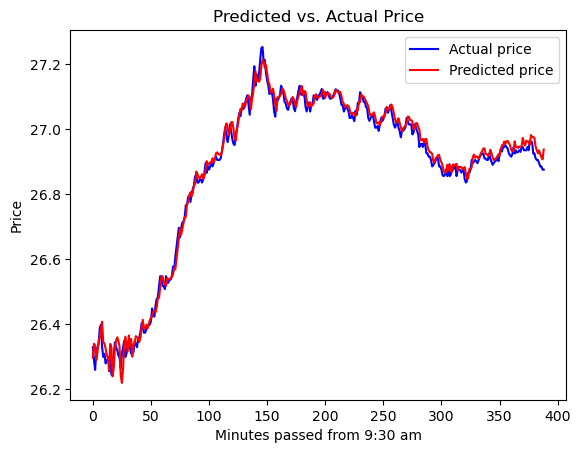

In [117]:
t = np.arange(389) # Taking the data of 389 timestamps hence used this

# The actual price is plotted in Blue
plt.plot(t, actual_price , color = 'blue', label='Actual price') 

# The predicted prize is plotted in Red
plt.plot(t, predicted_price, color = 'red', label='Predicted price')
plt.xlabel('Minutes passed from 9:30 am')
plt.ylabel('Price')
plt.title('Predicted vs. Actual Price')
plt.legend()

### Testing the trained model prices on the next to next day for price prediction

In [118]:
df_test_next1_day = df.loc[(df['Time'] >= '09:30:00') & (df['Time'] <= '16:00:00') & (df['Date'] == '2016-10-20')]

# Finding the maximum and the minimum value for that particular day to convert the predicted values to the actual prices
max_p_next1_day = df_test_next1_day['Close'].max()
min_p_next1_day = df_test_next1_day['Close'].min()

# Normalizing all the quantities for the next to next day
df_test_next1_day['Normalized_Close'] = normdata(df_test_next1_day['Close'])
df_test_next1_day['Normalized_Volume'] = normdata(df_test_next1_day['Volume'])
df_test_next1_day['Normalized_Open'] = normdata(df_test_next1_day['Open'])
df_test_next1_day['Normalized_High'] = normdata(df_test_next1_day['High'])
df_test_next1_day['Normalized_Low'] = normdata(df_test_next1_day['Low'])

X = df_test_next1_day[['Normalized_Close', 'Normalized_High', 'Normalized_Low', 'Normalized_Close', 'Normalized_Volume']][:-1].to_numpy() # Converting the 5 columns into a 2-D Numpy array
y = df_test_next1_day['Normalized_Close'][1:].to_numpy()


X = torch.tensor(X, dtype=torch.float32).reshape(X.shape[0], 1, -1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
# Training is not happening here, just written this to filter out the test data in the required format to be put in Data Loader
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1, shuffle=False)# Making training size = 1 so that other 389 values can be used for testing the model
loader = DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=75)
actual_price_next  = df_test_next1_day['Close'][2:]# Filtering out the actual data also to compare against the predicted values
#print(actual_price)

model.eval()
y_pred = model(X_test)
predicted_price_next = y_pred*(max_p_next1_day - min_p_next1_day) + min_p_next1_day # Inverting the operation performed by the min-max scaler function
predicted_price_next = predicted_price_next.detach().numpy()
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()
print((sum((y_pred - y_test)**2))) # Calcuating the squared error over all the entries
print(predicted_price_next.reshape(1,-1))# Printing the predicted prize
actual_price_next = actual_price_next.to_numpy()
#print(actual_price)

[0.5813545]
[[26.697615 26.684708 26.756954 26.701077 26.70763  26.718555 26.713068
  26.722763 26.697304 26.670202 26.646103 26.650343 26.707064 26.719666
  26.752436 26.78065  26.782959 26.785847 26.788729 26.766817 26.757914
  26.75921  26.75581  26.775698 26.765818 26.771355 26.773573 26.787222
  26.777182 26.78831  26.79308  26.785128 26.793657 26.826466 26.830849
  26.801945 26.784304 26.77692  26.73156  26.71872  26.703167 26.690939
  26.698162 26.690928 26.682903 26.67791  26.665565 26.652468 26.652754
  26.643028 26.629307 26.623701 26.634073 26.624723 26.605423 26.57215
  26.57457  26.576454 26.573708 26.529823 26.526537 26.546272 26.532423
  26.522112 26.493923 26.49363  26.474472 26.488571 26.491459 26.509089
  26.526236 26.523844 26.520157 26.537743 26.517727 26.528551 26.538122
  26.544422 26.557285 26.565401 26.572071 26.574068 26.591532 26.60436
  26.623857 26.624784 26.629887 26.638552 26.684902 26.714396 26.739494
  26.757893 26.785975 26.823881 26.799063 26.785496 26

/tmp/ipykernel_28645/2059926886.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_next1_day['Normalized_Close'] = normdata(df_test_next1_day['Close'])
/tmp/ipykernel_28645/2059926886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_next1_day['Normalized_Volume'] = normdata(df_test_next1_day['Volume'])
/tmp/ipykernel_28645/2059926886.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



### Plotting the Actual and the Predicted price of the model for the next to next day

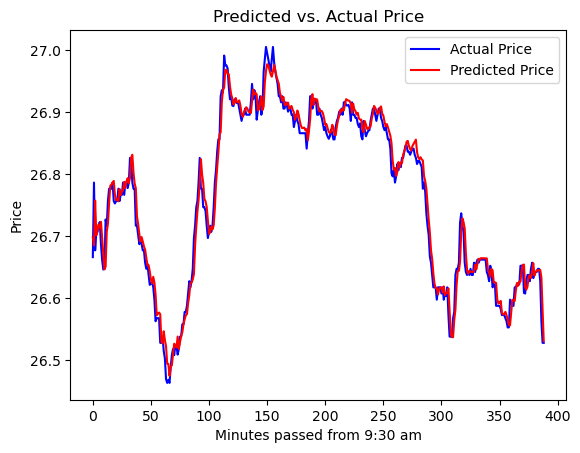

In [119]:
v = np.arange(389) # Taking the data of 389 timestamps hence used this

# The actual price is plotted in Blue
plt.plot(v, actual_price_next , color = 'blue', label = 'Actual Price') 

# The predicted prize is plotted in Red
plt.plot(v, predicted_price_next, color = 'red', label = 'Predicted Price')
plt.xlabel('Minutes passed from 9:30 am')
plt.ylabel('Price')
plt.title('Predicted vs. Actual Price')
plt.legend()

## Q7

### Trading Module to trade apple shares

In [120]:
class TradingModule:
    def __init__(self, ema_period = 7):
        self.cash_balance = 100000  # Starting cash balance (100,000 in this example)
        self.qty = 0
        self.ema_period = ema_period
        self.ema_values = []  # Dictionary to store EMA values for each symbol
        self.commission = 0.0005 # Let the commission for trading be 0.05% of the total price of transaction made 
        self.bid_Ask = 0.0009 # Let the bid-ask spread be 0.09% of the total price of transaction made

    # Defining a function to calculate the Exponential Moving Average for the stock
    def calculate_ema(self, price):
        if len(self.ema_values) >= self.ema_period:
            self.ema_values.pop(0)
        
        self.ema_values.append(price)

        if len(self.ema_values) < self.ema_period:
            return None

        ema = sum(self.ema_values) / len(self.ema_values)
        return ema
    # Setting conditions when to buy or sell
    def buy(self, amount, price):
        if self.cash_balance >= (1 + self.commission + self.bid_Ask) * amount * price :
            self.qty += amount
            self.cash_balance -= (1 + self.commission + self.bid_Ask) * amount * price
            print(f"Bought {amount} shares of at ${price} each.")

    def sell(self, amount, price):
        if self.qty >= amount:
            self.qty -= amount
            self.cash_balance += (1 - self.commission - self.bid_Ask) * amount * price
            print(f"Sold {amount} shares at ${price} each.")

    def hold(self):
        pass  # Do nothing, simply hold existing positions
    

    def execute_strategy(self, current_price):
        ema = self.calculate_ema(current_price)
        if ema is not None:
            if current_price > ema:
                self.buy(125, current_price) # Buying and selling a fixed number of stocks every time i.e. 125
            elif current_price < ema:
                self.sell(125, current_price)
            else:
                self.hold()

    def outp(self):
        print(self.cash_balance)
        print(self.qty)


## Q8

### Trading the stocks for the next 2 days on actual and predicted values and drawing a comparison between them

[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
Bought 125 shares of at $[26.35772] each.
[99995.38720703]
Bought 125 shares of at $[26.385967] each.
[99994.30053711]
Bought 125 shares of at $[26.407566] each.
[99995.07861328]
Sold 125 shares at $[26.34436] each.
[99966.76635742]
Sold 125 shares at $[26.340508] each.
[99961.19384766]
Sold 125 shares at $[26.324871] each.
[99954.63232422]
[99954.63232422]
[99954.63232422]
[99954.63232422]
Bought 125 shares of at $[26.339071] each.
[99950.02270508]
Bought 125 shares of at $[26.32723] each.
[99943.93530273]
Sold 125 shares at $[26.239347] each.
[99917.37255859]
Sold 125 shares at $[26.264442] each.
[99915.91308594]
Bought 125 shares of at $[26.327265] each.
[99911.3059082]
Bought 125 shares of at $[26.349096] each.
[99909.42333984]
Bought 125 shares of at $[26.359596] each.
[99907.43554688]
Bought 125 shares of at $[26.347958] each.
[99898.4597168]
Bought 125 shares of at $[26.331356] each.
[99885.55126953]
Sold 125 shares at 

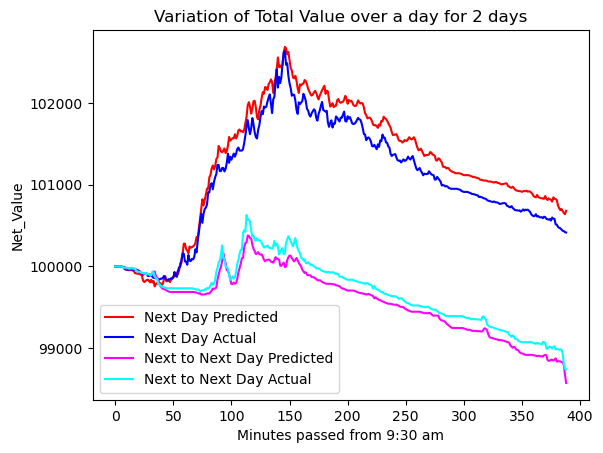

In [121]:
if __name__ == "__main__":
    # Initializing 4 objects of the TradingModule class where 2 store the actual values and other 2 store predicted
    trading_module_pred = TradingModule() 
    trading_module_actual = TradingModule()
    trading_module_pred_next = TradingModule()
    trading_module_actual_next = TradingModule()

KP = [0]*389 # Predicted Value List for next day
LP = [0]*389 # Predicted Value List for next to next day
KA = [0]*389 # Actual Value List for next day
LA = [0]*389 # Actual Value list for next to next day
for i, price in enumerate(predicted_price):
    trading_module_pred.execute_strategy(price) # Execute the strategy using the predicted prices for next day

    # Stores the sum of the cash balance and the current value of the portion invested in stocks
    TotalValues_predicted = trading_module_pred.cash_balance + price * trading_module_pred.qty
    KP[i] = TotalValues_predicted
    print(TotalValues_predicted)

for i, price in enumerate(predicted_price_next):
    trading_module_pred_next.execute_strategy(price) # Execute the strategy using the predicted prices for next to next day

    # Stores the sum of the cash balance and the current value of the portion invested in stocks
    TotalValues_predicted_next = trading_module_pred_next.cash_balance + price * trading_module_pred_next.qty
    LP[i] = TotalValues_predicted_next
    print(TotalValues_predicted_next)

for i, price in enumerate(actual_price):
    trading_module_actual.execute_strategy(price) # Execute the strategy using the actual prices for next day

    # Stores the sum of the cash balance and the current value of the portion invested in stocks
    TotalValues_actual = trading_module_actual.cash_balance + price * trading_module_actual.qty
    KA[i] = TotalValues_actual
    print(TotalValues_actual)

for i, price in enumerate(actual_price_next):
    trading_module_actual_next.execute_strategy(price) # Execute the strategy using the actual prices for next to next day

    # Stores the sum of the cash balance and the current value of the portion invested in stocks
    TotalValues_actual_next = trading_module_actual_next.cash_balance + price * trading_module_actual_next.qty
    LA[i] = TotalValues_actual_next
    print(TotalValues_actual_next)

h = np.arange(389)

plt.plot(h, KP, color='red', label='Next Day Predicted')
plt.plot(h, KA, color='blue', label='Next Day Actual')
plt.plot(h, LP, color='magenta', label='Next to Next Day Predicted')
plt.plot(h, LA, color='cyan', label='Next to Next Day Actual')

# Adding labels and legend
plt.xlabel('Minutes passed from 9:30 am')
plt.ylabel('Net_Value') 
plt.title('Variation of Total Value over a day for 2 days')
plt.legend()

# Show the plot
plt.show()

# df2['Bid_Ask_Spread'] = df2['Open']/ df2['Volume']*3000 # Take the Bid_ask spread as the ratio of the opening Price and the Volume multiplied by a constant



### Q8(a) There is no significant change in the deviation of performance of the model as we go further from the last time on which it was trained although the deviation would start becoming significant as we go far away

### Q8(b) There is significant profit in trading with commission and bid-ask spread on the next day but on the following day if we start afresh it leads to a slight loss 

### Q8(c) Using a simple buy hold strategy would lead to a better profiatbility as there is always a margin of the trade which goes to the brokers and the market makers. Hence the profits always increase if they are eliminated

## Q9 is in the Combined_Stock_Analysis.ipynb